<a href="https://colab.research.google.com/github/Gilangp/Machine-learning/blob/main/week%209/TG1_JS09_2341720042_Gilang_Purnomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [ ]:
data = pd.read_csv("data/insurance.csv")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
X = data.drop('charges', axis=1)
y = data['charges']

In [ ]:
print("\nFitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Fitur (X):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Target (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


## 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (y_train):", y_train.shape)

Ukuran data latih (X_train): (1070, 8)
Ukuran data uji (y_train): (1070,)


## 3. Lakukan feature scaling jika diperlukan.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [ ]:
lin_reg = LinearRegression()

## 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [ ]:
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

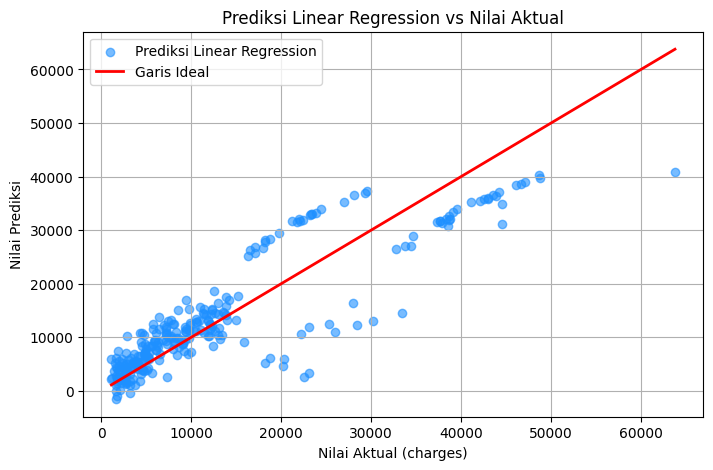

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='dodgerblue', label='Prediksi Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual (charges)')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi Linear Regression vs Nilai Aktual')
plt.legend()
plt.grid(True)
plt.show()

## 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("=== Evaluasi Multiple Linear Regression ===")
print(f"R-squared: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")

=== Evaluasi Multiple Linear Regression ===
R-squared: 0.7836
MSE: 33596915.85
MAE: 4181.19


## 7. Ulagi langkah 4 dengan menggunakan model SVR. Anda dapat bereksperimen dengan dengan melakukan hyperparameter tunning.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100],
    'gamma': ['scale', 0.1, 0.01],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(
    SVR(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Parameter terbaik hasil tuning:")
print(grid_search.best_params_)

Parameter terbaik hasil tuning:
{'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
best_svr = grid_search.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("\n=== Evaluasi Model SVR (Setelah Hyperparameter Tuning) ===")
print(f"R-squared: {r2_svr:.4f}")
print(f"MSE: {mse_svr:.2f}")
print(f"MAE: {mae_svr:.2f}")


=== Evaluasi Model SVR (Setelah Hyperparameter Tuning) ===
R-squared: 0.6508
MSE: 54217172.62
MAE: 3558.83


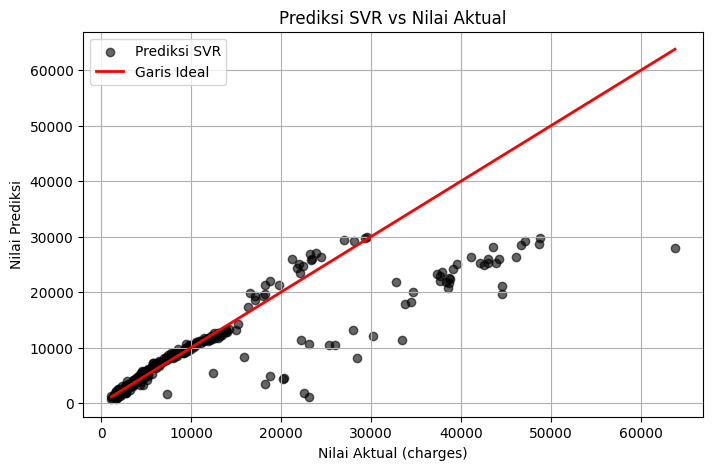

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='black', label='Prediksi SVR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2, label='Garis Ideal')
plt.xlabel('Nilai Aktual (charges)')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi SVR vs Nilai Aktual')
plt.legend()
plt.grid(True)
plt.show()

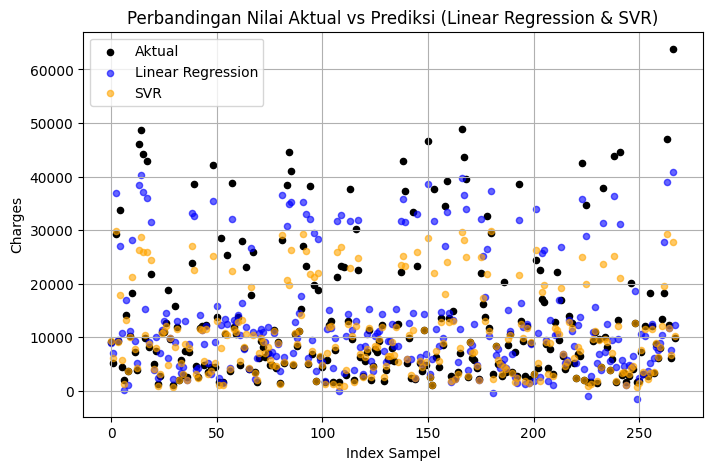

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, color='black', label='Aktual', s=20)
plt.scatter(range(len(y_test)), y_pred_lr, color='blue', alpha=0.6, label='Linear Regression', s=20)
plt.scatter(range(len(y_test)), y_pred_svr, color='orange', alpha=0.6, label='SVR', s=20)
plt.title('Perbandingan Nilai Aktual vs Prediksi (Linear Regression & SVR)')
plt.xlabel('Index Sampel')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()